In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('bio-5.csv')

In [3]:
x=df.drop('pIC50',axis=1)

In [4]:
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1075,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1076,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1077,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=df['pIC50']

In [75]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)
x.shape

(1079, 160)

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)
x.shape

(1079, 160)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.ensemble import ExtraTreesRegressor

In [9]:
np.random.seed(1)
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
r2=model.score(x_test,y_test)
r2

-0.3330967952355952

In [10]:
y_predict=model.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
r2

-0.3330967952355952

In [14]:
rmse

0.5725116526810745

Text(0.5, 1.0, 'Actual vs Predicted Scatter Plot')

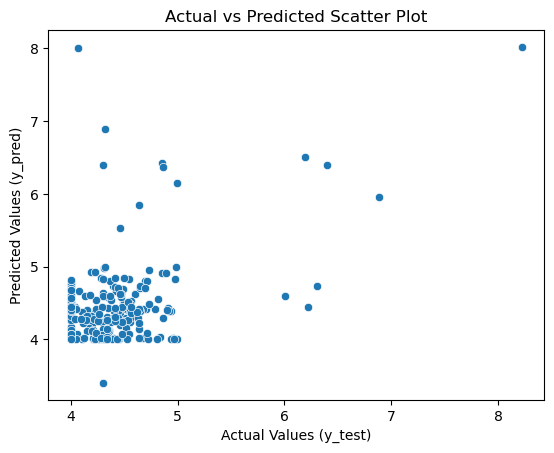

In [15]:
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Scatter Plot')

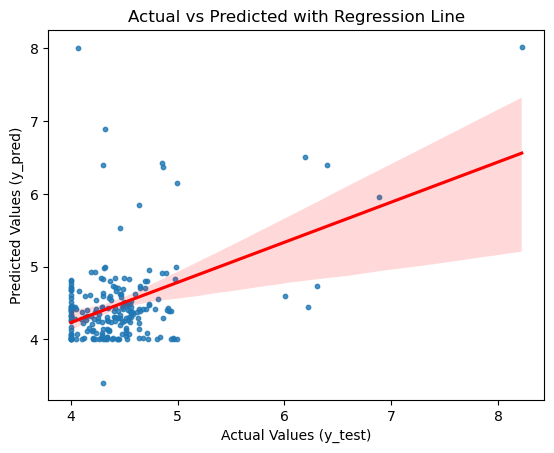

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with a regression line
sns.regplot(x=y_test, y=y_predict, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted with Regression Line')

# Show the plot
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scores = cross_val_score(model, x, y, cv=5)  # Using 5-fold cross-validation

# Output results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")

Cross-validation scores: [-2.13314    -1.4378837  -2.38418062 -1.06529483 -0.25244266]
Mean accuracy: -1.4545883618924145
Standard deviation of accuracy: 0.7644026242892346


In [19]:
np.random.seed(1)
model = RandomForestRegressor(n_estimators=500,max_depth=50,random_state=42)
model.fit(x_train,y_train)
r2=model.score(x_test,y_test)
r2

0.26274876197373864

In [20]:
y_predict=model.predict(x_test)

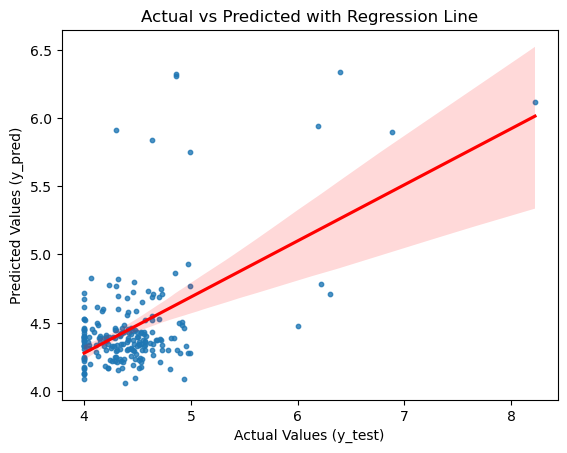

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with a regression line
sns.regplot(x=y_test, y=y_predict, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted with Regression Line')

# Show the plot
plt.show()

In [22]:
scores = cross_val_score(model, x, y, cv=5)  # Using 5-fold cross-validation

# Output results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")

Cross-validation scores: [-0.52478741 -0.40133674 -0.42525888 -0.13717085 -0.32528811]
Mean accuracy: -0.36276839767826935
Standard deviation of accuracy: 0.12956987370006892


In [23]:
print(type(y))
print(y[:10])  # Show the first 10 labels
y.isnull().sum()

<class 'pandas.core.series.Series'>
0    4.000000
1    4.909742
2    4.000000
3    4.292685
4    4.000000
5    4.729554
6    4.000000
7    4.369165
8    4.260428
9    4.319302
Name: pIC50, dtype: float64


0

In [24]:
model=SVR()
model.fit(x_train,y_train)
r2=model.score(x_test,y_test)
r2

0.2345534374166589

In [25]:
y_predict=model.predict(x_test)

In [26]:
scores = cross_val_score(model, x, y, cv=5)  # Using 5-fold cross-validation

# Output results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")

Cross-validation scores: [-0.27265611 -0.25313412 -0.38690062 -0.13129955 -0.38339416]
Mean accuracy: -0.2854769139997612
Standard deviation of accuracy: 0.0947160407938857


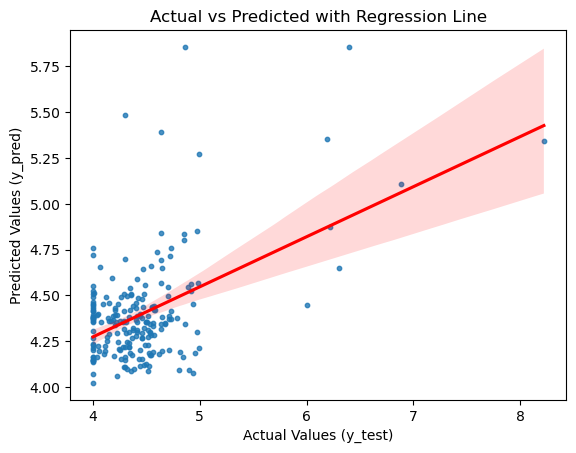

In [27]:
sns.regplot(x=y_test, y=y_predict, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted with Regression Line')

# Show the plot
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [29]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train,y_train)
r2=model.score(x_test,y_test)
r2

0.24263709511276532

In [30]:
scores = cross_val_score(model, x, y, cv=5)  # Using 5-fold cross-validation

# Output results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")

Cross-validation scores: [-0.85310348 -0.34118027 -0.40737306 -0.18675357 -0.34335953]
Mean accuracy: -0.4263539835876686
Standard deviation of accuracy: 0.2254002697238787


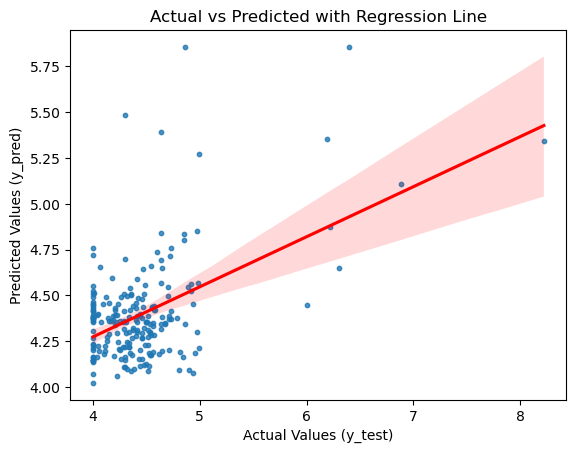

In [31]:
sns.regplot(x=y_test, y=y_predict, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted with Regression Line')

# Show the plot
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error



# Initialize Random Forest with bootstrap sampling (default: bootstrap=True)
rf_bootstrap = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_bootstrap.fit(x_train, y_train)

# Initialize Random Forest without bootstrap sampling (bootstrap=False)
rf_no_bootstrap = RandomForestRegressor(n_estimators=500, bootstrap=False, random_state=42)
rf_no_bootstrap.fit(x_train, y_train)

# Make predictions
y_pred_bootstrap = rf_bootstrap.predict(x_test)
y_pred_no_bootstrap = rf_no_bootstrap.predict(x_test)

# Evaluate the models
mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
mse_no_bootstrap = mean_squared_error(y_test, y_pred_no_bootstrap)

print(f"Mean Squared Error with bootstrap sampling: {mse_bootstrap:.2f}")
print(f"Mean Squared Error without bootstrap sampling: {mse_no_bootstrap:.2f}")


Mean Squared Error with bootstrap sampling: 0.18
Mean Squared Error without bootstrap sampling: 0.33


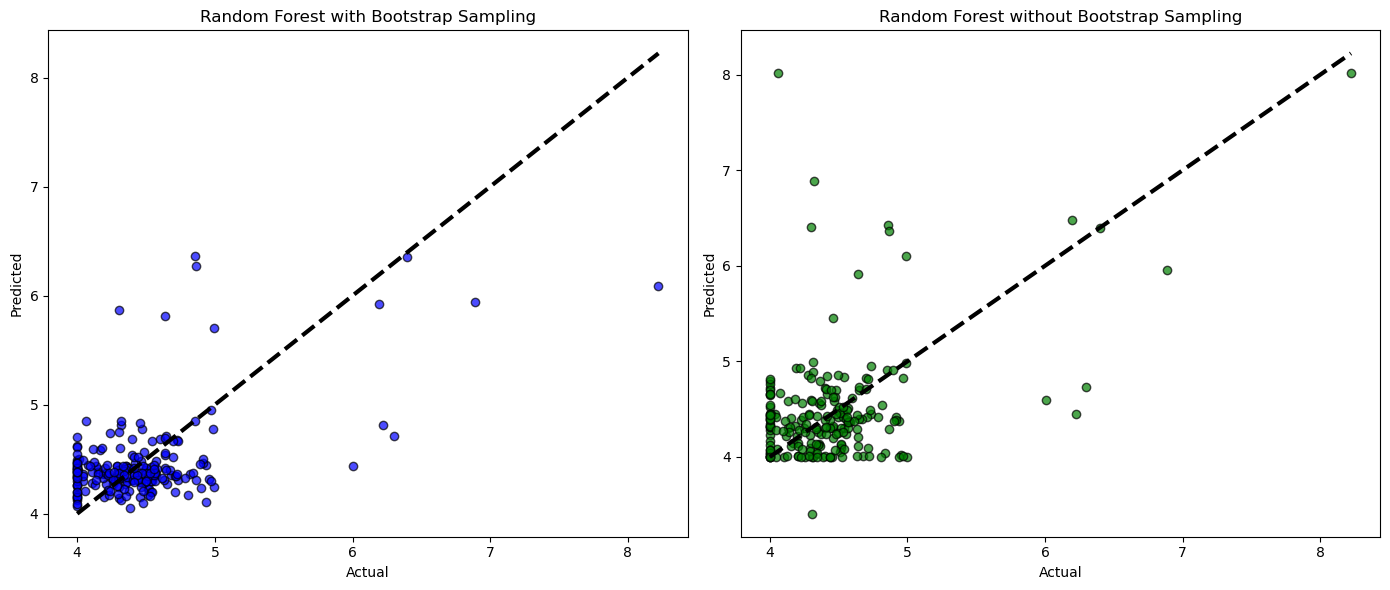

In [68]:
plt.figure(figsize=(14, 6))

# Plot for bootstrap sampling
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_bootstrap, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Random Forest with Bootstrap Sampling')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for no bootstrap sampling
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_no_bootstrap, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Random Forest without Bootstrap Sampling')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [72]:
cv_folds = 5  # Number of folds

# Cross-validation for model with bootstrap
cv_scores_bootstrap = cross_val_score(rf_bootstrap, x, y, cv=cv_folds, scoring='neg_mean_squared_error')
cv_rmse_bootstrap = np.sqrt(-cv_scores_bootstrap)

# Cross-validation for model without bootstrap
cv_scores_no_bootstrap = cross_val_score(rf_no_bootstrap, x, y, cv=cv_folds, scoring='neg_mean_squared_error')
cv_rmse_no_bootstrap = np.sqrt(-cv_scores_no_bootstrap)

# Display cross-validation results
print(f"Cross-Validated RMSE with bootstrap sampling: {cv_rmse_bootstrap.mean():.2f} ± {cv_rmse_bootstrap.std():.2f}")
print(f"Cross-Validated RMSE without bootstrap sampling: {cv_rmse_no_bootstrap.mean():.2f} ± {cv_rmse_no_bootstrap.std():.2f}")


Cross-Validated RMSE with bootstrap sampling: 0.45 ± 0.30
Cross-Validated RMSE without bootstrap sampling: 0.54 ± 0.24
